# Тема 1. Интерполяция в полиномиальных базисах

In [2]:
%matplotlib inline

import numpy as np
import scipy.linalg as la
import scipy.interpolate as interp
import scipy.integrate as integrate
import matplotlib as mpl
import matplotlib.pyplot as plt
import sympy

default_dpi = mpl.rcParamsDefault['figure.dpi']
factor = 1
mpl.rcParams['figure.dpi'] = default_dpi * factor

## Часть 1. Интерполяция полиномами

### Пример 1

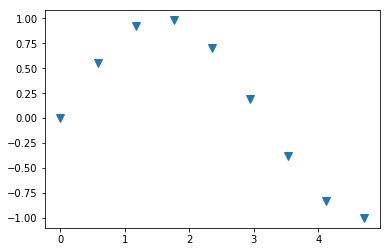

In [3]:
n_points = 9
x_start = 0.
x_end = 1.5*np.pi
x_a = np.linspace (x_start, x_end, num=n_points, endpoint=True )
y_a = np.sin(x_a) 
plt.plot(x_a, y_a, 'v', markersize=8)



           8             7             6           5            4
1.562e-05 x - 0.0001731 x - 0.0005492 x + 0.01067 x - 0.004945 x
          3            2
 - 0.161 x - 0.003309 x + 1.001 x


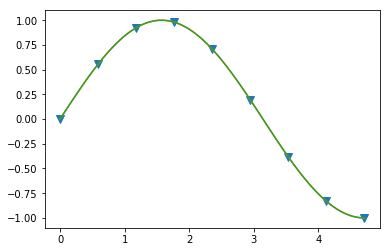

In [4]:
poly_a = interp.lagrange(x_a, y_a)
x_d = np.linspace (x_start, x_end, num=100, endpoint=True )
y_d = np.sin(x_d)
print (poly_a)
plt.plot(x_a, y_a, 'v', markersize=8)
plt.plot(x_d, poly_a(x_d))
plt.plot(x_d, y_d)

### Пример 2

       4             3         2
3.316 x + 1.041e-17 x - 4.277 x + 5.204e-18 x + 1


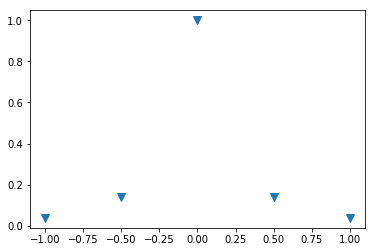

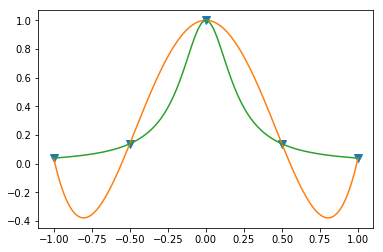

In [5]:
n_points = 5
x_start = -1.0
x_end = 1.0

x_f = np.linspace (x_start, x_end, num=n_points, endpoint=True )
y_f = 1/(1+25*x_f*x_f)
#y_f = np.exp(-x_f**2)

plt.plot(x_f, y_f, 'v', markersize=8)
plt.figure ()

poly_f = interp.lagrange(x_f, y_f)
print (poly_f)

x_plot = np.linspace (x_start, x_end, num=100, endpoint=True )

y_plot = 1/(1+25*x_plot*x_plot)
#y_plot = np.exp(-x_plot**2)

plt.plot(x_f, y_f, 'v', markersize=8)
plt.plot(x_plot, poly_f(x_plot))
plt.plot(x_plot, y_plot)

### Расположение узлов интерполяции в корнях полинома Чебышева

        14             13        12             11        10
-333.6 x  + 1.527e-12 x  + 1264 x  + 1.563e-11 x  - 1927 x 
              9        8             7         6             5       4
 - 1.325e-12 x + 1511 x - 6.759e-12 x - 646.9 x + 5.174e-13 x + 149 x
              3         2
 - 1.483e-13 x - 17.36 x + 9.671e-16 x + 1


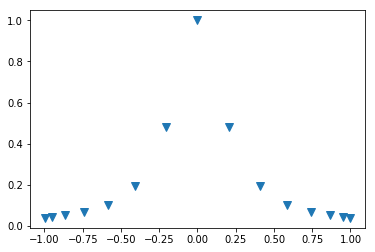

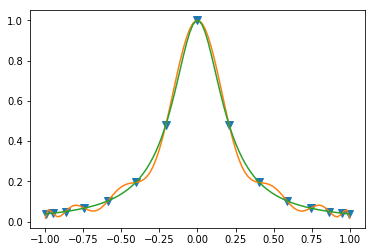

In [6]:
#x_f = np.arange(-1.0, 1.25, 0.25)
n_points = 15
x_f = np.zeros ((n_points))

for k in range(0, n_points):
        x_f[k] = np.cos((np.pi/2+np.pi*k)/n_points)
        x_f[k] = (x_start+x_end)/2 + (x_end-x_start)/2*x_f[k]
y_f = 1/(1+25*x_f*x_f)
#y_f = np.exp(-x_f**2)

plt.plot(x_f, y_f, 'v', markersize=8)
plt.figure ()

poly_f = interp.lagrange(x_f, y_f)
print (poly_f)

y_plot = 1/(1+25*x_plot*x_plot)
#y_plot = np.exp(-x_plot**2)
plt.plot(x_f, y_f, 'v', markersize=8)
plt.plot(x_plot, poly_f(x_plot))
plt.plot(x_plot, y_plot)

## Часть 2. Сплайн - интерполяция

### Пример 3

[-1.  -0.5  0.   0.5  1. ]
[0.  0.5 0.9 1.  0.8]


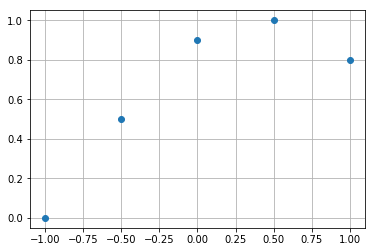

In [7]:
x = np.array([-1, -0.5, 0, 0.5, 1])
y = np.array([0, 0.5, 0.9, 1, 0.8])
print (x)
print (y)

plt.grid()
plt.plot(x, y, 'o')

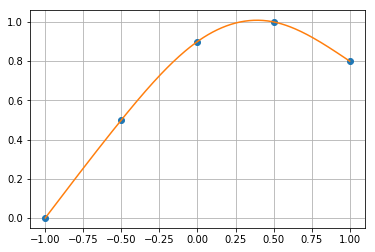

In [8]:
cubic = interp.CubicSpline(x, y, bc_type='natural')

x_d = np.arange (-1, 1.01, 0.01)
plt.grid()
plt.plot(x, y, 'o')
plt.plot(x_d, cubic(x_d))

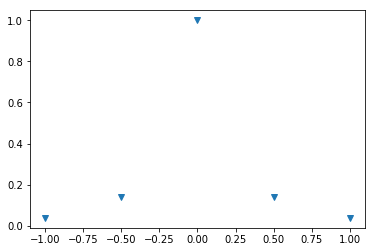

In [9]:
n_points = 5
x_start = -1.0
x_end = 1.0

x_c = np.linspace (x_start, x_end, num=n_points, endpoint=True )
y_c = 1/(1+25*x_c*x_c)
#y_c = np.exp(-x_c**2)

plt.plot(x_c, y_c, 'v')

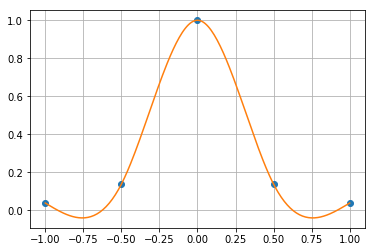

In [10]:
cubic = interp.CubicSpline(x_c, y_c, bc_type='natural')
x_plot = x_d
plt.grid()
plt.plot(x_c, y_c, 'o')

plt.plot(x_plot, cubic(x_plot))

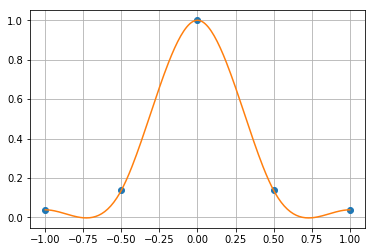

In [11]:
cubic = interp.CubicSpline(x_c, y_c, bc_type='clamped')
plt.grid()
x_plot = x_d
plt.plot(x_c, y_c, 'o')
plt.plot(x_plot, cubic(x_plot))